# Credit Card Default Payment Prediction
## Logistic Regression, Ridge, Decision Tree, and Random Forest Classification
>### Author: Christina Lu Jin,
>### Co-Author: Ngoc Tran, Mengyu Yang, Sneka kumar, Abishek Srinivas

# Setup: Libraries and packages

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score,precision_score
from sklearn import tree 
from sklearn.preprocessing import LabelEncoder

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

import requests
import io
import scipy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import data, wb
import fix_yahoo_finance as yf
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure
from matplotlib.pyplot import style
import matplotlib.ticker as mtick
import datetime
from datetime import date
from dateutil.parser import parse
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import RidgeClassifier
from pprint import pprint
from sklearn.metrics import roc_auc_score,accuracy_score, precision_score, recall_score,precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import metrics # for the check the error and accuracy of the model

import seaborn as sns

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# Data preparation

### Data Set Information:

**This research aimed at the case of customers default payments in Taiwan**

### Features description:
ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment in June, 2005 (1=yes, 0=no)

In [ ]:
data_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTUuIaQ9l1B1ZxMZ-ucOUOzqX_uLcd7qA_HxHtB9MejT-G1SxcxTjE7k_rVpFFKl4me8wbppZRgJXUi/pub?gid=325578529&single=true&output=csv'

In [ ]:
df = pd.read_csv(data_path)
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,0,0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,0,0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,0,-1,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [ ]:
#set ID as Index
df = df.set_index('ID')

# Exploratory Data Analysis

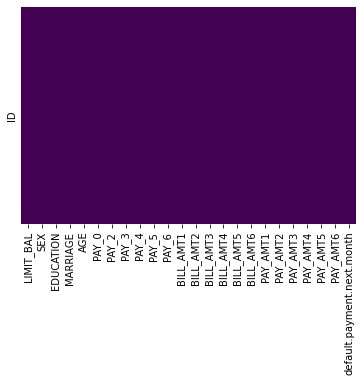

In [ ]:
#check for NA values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Rename the default.payment.next.month column to Default
df.rename(columns={"default.payment.next.month": "Default"}, inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'DISTRIBUTION OF DEFAULT')

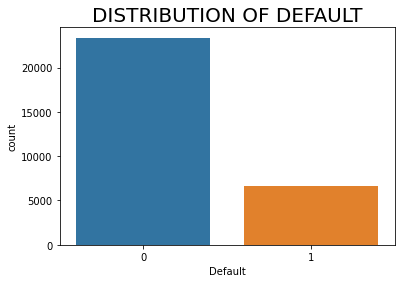

In [ ]:
#Distribution of default
sns.countplot('Default',data=df)
plt.title('DISTRIBUTION OF DEFAULT', size=20)

In [ ]:
#Edit unused education values
df['EDUCATION'].replace (0,4,inplace = True)
df['EDUCATION'].replace (5,4,inplace = True)
df['EDUCATION'].replace (6,4,inplace = True)

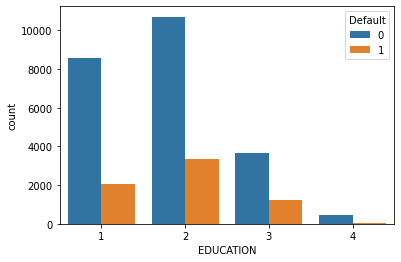

In [ ]:
#Distribution of default by education
sns.countplot(x='EDUCATION', hue='Default', data = df)

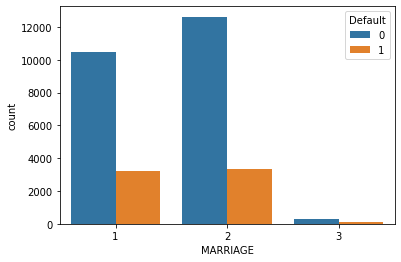

In [ ]:
df['MARRIAGE'].replace (0,3,inplace = True)
#Distribution of default by Marriage
sns.countplot(x='MARRIAGE', hue='Default', data = df)

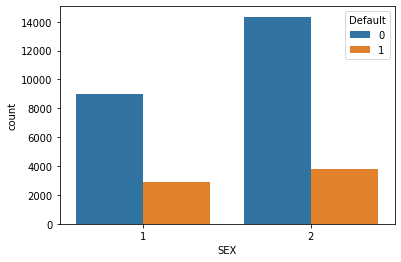

In [ ]:
#Distribution of default by SEX
sns.countplot(x='SEX', hue='Default', data = df)

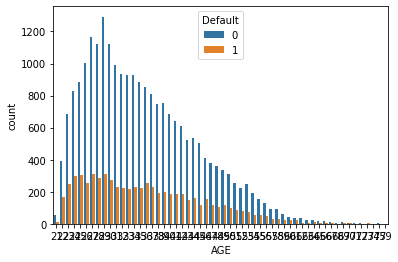

In [ ]:
#Distribution of default by age
sns.countplot(x='AGE', hue='Default', data = df)

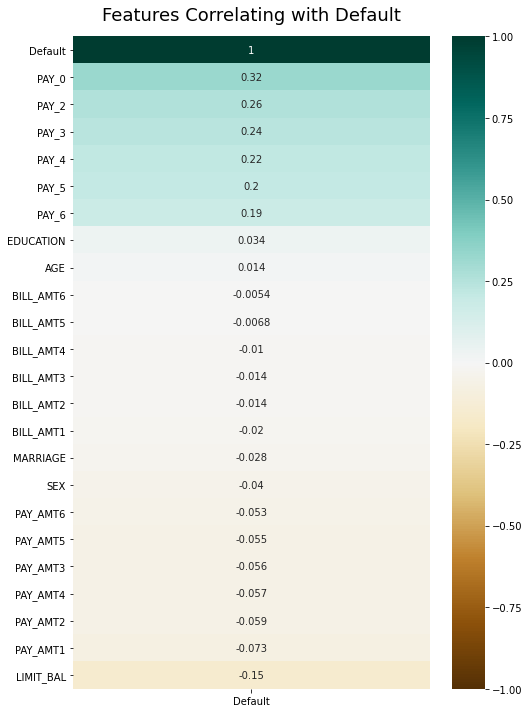

In [ ]:
#Correlation For Default(Target Variable)with other Variables
df.corr()[['Default']].sort_values(by='Default', ascending=False)
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Default']].sort_values(by='Default', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Default', fontdict={'fontsize':18}, pad=16);

#### EDA Summary:

* There is no missing values in the dataset.
* Average Amount of bill statement seems to increase for every month.
* Countplot depicts only 22% of people make creditcard payment for Month of June,2005(Default1= yes,Default0=No).
* Marriage feature has half(nearly 53%)of customers with marital status-single(Marriage 1=Single) and the default payment with status single has 50-50 chance to make it on Month of June,2005.
* Heat map shows that the target variable(Default) has no strong relationship with any of the features in the dataset.


# Models

## Logistic Regression Classification

### Build Model

In [ ]:
#Features: all columns except last one
X = df.iloc[:,df.columns != 'Default']
#target is default.payment.next.month
y = df['Default']

In [ ]:
#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
'''
print(X_train)
print(y_train)
print(X_test)
print(y_test)
'''

'\nprint(X_train)\nprint(y_train)\nprint(X_test)\nprint(y_test)\n'

#### Instantiate LR model

In [ ]:
#TOTAL NO. of ITERATIONS REACHED LIMIT, set max_iter to 500
LR_model = LogisticRegression(max_iter=500,random_state=0)

In [ ]:
#fit the model
LR_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#model prediction
LR_pred = LR_model.predict(X_test)
#prediction probabilities
LR_prob_pred = LR_model.predict_proba(X_test)

### LR-Model Evaluation

In [ ]:
#model score
print('The score of decision tree model is {:.4f}'.format(LR_model.score(X_test,y_test)))

The score of decision tree model is 0.7756


In [ ]:
#accuracy score
LR_accu = accuracy_score(y_test, LR_pred)
print("The accuracy score of the Logistic Regression Classifier is {:.4f}".format(LR_accu))

The accuracy score of the Logistic Regression Classifier is 0.7756


In [ ]:
#precision score
LR_preci = precision_score(y_test,LR_pred)
print("The precision score of the Logistic Regression Classifier is {:.4f}".format(LR_preci))

The precision score of the Logistic Regression Classifier is 0.2500


In [ ]:
#confusion matrix
confusion_matrix(y_test, LR_pred)

array([[6979,    3],
       [2017,    1]])

The accuracy test shows a 0.78 accuracy. Confusion matrix shows the Logistic Regression model correctly predict all case where default payment is 0 (no default payment), but does not correctly predict where default payment is 1 (there is default payment). 

It is possible that there is too many predictors, hence trying Ridge Classifier.

##Ridge Classifier

In [ ]:
#Ridge model
Ridge_model = RidgeClassifier(max_iter=500)
#fit the model
Ridge_model.fit(X_train, y_train)
#make predication
Ridge_pred = Ridge_model.predict(X_test)

In [ ]:
#model score
print('The score of ridge classifier is {:.4f}'.format(Ridge_model.score(X_test,y_test)))

The score of ridge classifier is 0.7964


#### Ridge Classifier-Model Evaluation

In [ ]:
#accuracy score
Ridge_accu = accuracy_score(Ridge_pred,y_test)
print("The accuracy of the Ridge Classifier is {:.4f}".format(Ridge_accu))

The accuracy of the Ridge Classifier is 0.7964


In [ ]:
#precision score
Ridge_preci = precision_score(y_test,Ridge_pred)
print("The precision score of the Ridge Classifier is {:.4f}".format(Ridge_preci))

The precision score of the Ridge Classifier is 0.7500


In [ ]:
#confusion matrix
confusion_matrix(y_test, Ridge_pred)

array([[6889,   93],
       [1739,  279]])

## Decision Tree Classifier

### Build Model

In [ ]:
dc = DecisionTreeClassifier(min_samples_split=50,min_samples_leaf=10,random_state=10)
dc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [ ]:
#model score
print('The score of decision tree model is {:.4f}'.format(dc.score(X_test,y_test)))

The score of decision tree model is 0.7941


#### DecisionTreeClassifier-Model Evaluation

In [ ]:
pred = dc.predict(X_test)
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                       columns =['DecisionTree'])
metrics.loc['accuracy','DecisionTree'] = accuracy_score(y_pred= pred, y_true=y_test)
metrics.loc['precision','DecisionTree'] = precision_score(y_pred= pred, y_true=y_test)
metrics.loc['recall','DecisionTree'] = recall_score(y_pred= pred, y_true=y_test)

In [ ]:
CM = confusion_matrix(y_pred= pred, y_true=y_test)
CM

array([[6442,  540],
       [1313,  705]])

In [ ]:
metrics*100

,DecisionTree
accuracy,79.4111
precision,56.6265
recall,34.9356


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      6982
           1       0.57      0.35      0.43      2018

    accuracy                           0.79      9000
   macro avg       0.70      0.64      0.65      9000
weighted avg       0.77      0.79      0.78      9000



## Random Forest Classification with Grid Search

In [ ]:
rfc = RandomForestClassifier(random_state=10)
pprint(rfc)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)


### Exhaustive Grid search(1)

In [ ]:
n_estimators = [100, 300]
max_depth = [5, 8]


param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)


rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 3, 
                      n_jobs = -1, cv = 5)

best_rfc = rfc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


In [ ]:
print('The top performing model has parameters of {}'.format( best_rfc.best_params_))
print('The score of the top performing model is {:.4f}'.format(best_rfc.best_score_))


The top performing model has parameters of {'max_depth': 8, 'n_estimators': 300}
The score of the top performing model is 0.8205


In [ ]:
#build the top model
top_rfc = RandomForestClassifier(n_estimators = 100,max_depth = 8, random_state=10)
#trainig the model
top_rfc.fit(X_train,y_train)
#make prediction
top_pred = top_rfc.predict(X_test)

#### RandomForestClassifier(Grid Search-1)-Model Evaluation

In [ ]:
#accuracy score
top_accu = accuracy_score(y_test,top_pred)
print("The accuracy of RF Classifier with grid search(1) is {:.4f}".format(top_accu))

The accuracy of RF Classifier with grid search(1) is 0.8203


In [ ]:
#precision score
top_preci = precision_score(y_test,top_pred)
print("The precision score of RF Classifier with grid search(1) is {:.4f}".format(top_preci))

The precision score of RF Classifier with grid search(1) is 0.6968


In [ ]:
confusion_matrix(y_test,top_pred)

array([[6673,  309],
       [1308,  710]])

In [ ]:
pd.crosstab(y_test, top_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6673,309,6982
1,1308,710,2018
All,7981,1019,9000


### Exhaustive Grid search(2)

In [ ]:
#20 mins to run...
n_estimators = [800, 1200]
max_depth = [25, 30]
min_samples_split = [15, 100]


param_grid = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)


rfc_cv = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose = 3, 
                      n_jobs = -1, cv = 5)


In [ ]:
best_rfc2 = rfc_cv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 16.4min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 22.6min finished


In [ ]:
print('The top performing model has parameters of {}'.format( best_rfc2.best_params_))
print('The score of the top performing model is {:.4f}'.format(best_rfc2.best_score_))


The top performing model has parameters of {'max_depth': 25, 'min_samples_split': 100, 'n_estimators': 800}
The score of the top performing model is 0.8217


In [ ]:
#build the top model
top_rfc2 = RandomForestClassifier(n_estimators = 800,max_depth = 30, min_samples_split=100,random_state=10)
#trainig the model
top_rfc2.fit(X_train,y_train)
#make prediction
top_pred2 = top_rfc2.predict(X_test)

#### RandomForestClassifier-Model Evaluation

In [ ]:
#accuracy score
top_accu2 = accuracy_score(y_test,top_pred2)
print("The accuracy of RF Classifier with grid search(1) is {:.4f}".format(top_accu2))

The accuracy of RF Classifier with grid search(1) is 0.8214


In [ ]:
#precision score
top_preci2 = precision_score(y_test,top_pred2)
print("The precision score of RF Classifier with grid search(1) is {:.4f}".format(top_preci2))

The precision score of RF Classifier with grid search(1) is 0.6952


In [ ]:
confusion_matrix(y_test,top_pred2)

array([[6661,  321],
       [1286,  732]])

In [ ]:
pd.crosstab(y_test, top_pred2, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,6661,321,6982
1,1286,732,2018
All,7947,1053,9000


## Top performing models

In [ ]:
metrics = pd.DataFrame(index=['accuracy','precision','recall'],
                       columns =['Decision Tree','Logistic Regression',
                                 'Ridge Classification','RFC(grid search 1)',
                                 'RFC(grid search 2)'])
metrics.loc['accuracy','Decision Tree'] = accuracy_score(y_pred= pred, y_true=y_test).round(4)
metrics.loc['precision','Decision Tree'] = precision_score(y_pred= pred, y_true=y_test).round(4)
metrics.loc['recall','Decision Tree'] = recall_score(y_pred= pred, y_true=y_test).round(4)

metrics.loc['accuracy','Ridge Classification'] = Ridge_accu.round(4)
metrics.loc['precision','Ridge Classification'] = Ridge_preci.round(4)
metrics.loc['recall','Ridge Classification'] = recall_score(y_pred= Ridge_pred, y_true=y_test).round(4)

metrics.loc['accuracy','Logistic Regression'] = LR_accu.round(4)
metrics.loc['precision','Logistic Regression'] = LR_preci.round(4)
metrics.loc['recall','Logistic Regression'] = recall_score(y_pred= LR_pred, y_true=y_test).round(4)

metrics.loc['accuracy','RFC(grid search 1)'] = top_accu.round(4)
metrics.loc['precision','RFC(grid search 1)'] = top_preci.round(4)
metrics.loc['recall','RFC(grid search 1)'] = recall_score(y_pred= top_pred, y_true=y_test).round(4)

metrics.loc['accuracy','RFC(grid search 2)'] = top_accu2.round(4)
metrics.loc['precision','RFC(grid search 2)'] = top_preci2.round(4)
metrics.loc['recall','RFC(grid search 2)'] = recall_score(y_pred= top_pred2, y_true=y_test).round(4)

In [ ]:
metrics

,Decision Tree,Logistic Regression,Ridge Classification,RFC(grid search 1),RFC(grid search 2)
accuracy,0.7941,0.7756,0.7964,0.8203,0.8214
precision,0.5663,0.25,0.75,0.6968,0.6952
recall,0.3494,0.0005,0.1383,0.3518,0.3627


## Model conclusions

Top three models in accuracy scores:

1. Random Forest Classification with grid search pattern two: 
  
  The accuracy score is 0.8262, which is the highest in all models.
  
  We used grid search to determine the best values for `n_estimators`,`max_depth` and `min_samples_split`.
  
  The result shows that this model has parameters of `'max_depth': 30, 'min_samples_split': 100, 'n_estimators': 1200` and a model score of 0.8203.

2. Random Forest Classification with grid search pattern one: 
  
  The accuracy score is 0.8247, which only slightly lower than grid search pattern two model. We think it is because this model has one less parameter compare to the other grid search model
  
  We used grid search to determine the best values for `n_estimators` and 
`max_depth`.
  
  The result shows that this model has has parameters of `'max_depth': 8, 'n_estimators': 100`
The score of the top performing model is 0.8184.

3.  Ridge Classifier:

  The accuracy score is 0.8062. The precision score is 0.7579. We think Ridge Classifier is overall the best model for this dataset, since it has decent accuracy and precistion at the same time. 

  The parameters for ridge classifier are default values except we set max_iter to 500, so it won't threw error.









# Predictions

In [ ]:
predicted_values = pd.DataFrame(data = {'LIMIT_BAL': [3000,4000,5000,7000,10000],'SEX':[1,2,2,1,2],'EDUCATION':[2,2,3,4,5],'MARRIAGE':[1,2,1,2,2],
                                        'AGE':[28,34,24,63,56],'PAY_0':[1,-1,3,-1,5],'PAY_2':[1,2,3,-1,1],'PAY_3':[-1,-1,5,7,9],'PAY_4':[-1,9,2,-1,2],
                                        'PAY_5': [-1,1,2,4,1],'PAY_6':[-1,2,3,1,4],'BILL_AMT1':[3000,2400,4024,1356,1616],'BILL_AMT2':[400,234,616,2334,1123],
                                        'BILL_AMT3':[160,123,758,4880,3745],'BILL_AMT4':[1616,846,3555,5646,2788],'BILL_AMT5':[1000,2030,4440,6036,9029],
                                        'BILL_AMT6':[70,266,1234,666,7575],
                                        'PAY_AMT1':[3000,2356,33,155,666],
                                        'PAY_AMT2':[400,45,336,1333,334],'PAY_AMT3':[125,123,750,4880,3744],'PAY_AMT4':[1416,846,1555,5646,1788],
                                        'PAY_AMT5':[500,2030,3440,4036,9029],'PAY_AMT6':[70,266,1234,666,7575]})


In [ ]:
#RFC(grid search2)
RFC2_fin = pd.DataFrame(top_rfc2.predict(predicted_values), columns = {'RFC2'}).set_index([pd.Index(predicted_values.index)])
#RFC(grid search1)
RFC1_fin = pd.DataFrame(top_rfc.predict(predicted_values), columns = {'RFC1'}).set_index([pd.Index(predicted_values.index)])
#Ridge Classification
Ridge_fin = pd.DataFrame(Ridge_model.predict(predicted_values), columns = {'Ridge'}).set_index([pd.Index(predicted_values.index)])
#Decision tree
#dc_fin = pd.DataFrame(dc.predict(predicted_values), columns = {'Decision tree'}).set_index([pd.Index(predicted_values.index)])
#LR
#LR_fin = pd.DataFrame(LR_model.predict(predicted_values), columns = {'Logit'}).set_index([pd.Index(predicted_values.index)])

In [ ]:
all_together_df = predicted_values.join(RFC2_fin).join(RFC1_fin).join(Ridge_fin)
all_together_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,RFC2,RFC1,Ridge
0,3000,1,2,1,28,1,1,-1,-1,-1,-1,3000,400,160,1616,1000,70,3000,400,125,1416,500,70,0,0,0
1,4000,2,2,2,34,-1,2,-1,9,1,2,2400,234,123,846,2030,266,2356,45,123,846,2030,266,0,0,0
2,5000,2,3,1,24,3,3,5,2,2,3,4024,616,758,3555,4440,1234,33,336,750,1555,3440,1234,1,1,1
3,7000,1,4,2,63,-1,-1,7,-1,4,1,1356,2334,4880,5646,6036,666,155,1333,4880,5646,4036,666,0,0,0
4,10000,2,5,2,56,5,1,9,2,1,4,1616,1123,3745,2788,9029,7575,666,334,3744,1788,9029,7575,1,0,1


## Prediction Summary:
Two Random Forest Classification models gave identical predictions. However, while Ridge model yields same predication for first 4 customers, the last one's prediction is different from other two models. Other two models predict no default payment and Ridge predict there will be default payment next month.

Default payment prediction is really important and useful for bankers. Avoiding loan money to people who are likely to have a default payment can assure a stable economy instead a recession.



# References:
Hyperparameter Tuning the Random Forest in Python: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

Overview of Classification Methods in Python: https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/ 